# 02. Pandas를 이용한 데이터 셋 구축 및 관리
> Numpy 기반의 라이브러리인 Pandas를 배워보고, 데이터셋을 구축해봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 3]
- permalink: /pandas_practice
- exec: colab

이번 강의에서는 파이썬 데이터셋 관리의 표준이라고 해도 무방한 pandas에 대해 배워봅니다. pandas는 '표'형식의 데이터를 다루는데에 특화되어있습니다. 추가로 학습 데이터와 테스트 데이터를 구성하는 방법에 대해 배웁니다. 우선 실습을 위해 아래에서 데이터셋을 다운로드 받고, 압축을 풀어서 전부 sample_data 폴더에 넣어주세요. 

https://github.com/gusdnd852/bigdata-lecture/files/4948512/pandas_practice.zip

<br>

```
root경로
    |_...
    |_sample_data
        |_friend_list.csv
        |_iris.csv
```

<br>

위 처럼 압축을 모두 풀고 sample_data 폴더에 넣어주세요. (그냥 드래그 하시면 됩니다!!)

<br><br>

### 1. 파일에서 데이터 불러오기 (read_csv)
pandas에서 파일에 저장되어있는 데이터를 불러오는 방법은 read_csv 함수를 이용하는 방법이 있습니다. 보통 표 형식으로 된 데이터는 csv파일로 저장하고 불러오는 것이 편합니다.

In [1]:
import pandas as pd


data_frame = pd.read_csv('sample_data/friend_list.csv')
data_frame

,name,age,job
0,John,20,student
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist
4,Brian,45,manager
5,Chris,25,intern


head 함수는 앞에서부터 n개씩 출력하는 함수입니다.

In [2]:
data_frame.head(3)

,name,age,job
0,John,20,student
1,Jenny,30,developer
2,Nate,30,teacher


비슷한 함수로 뒤에서 부터 출력하는 tail 함수가 있습니다. 

In [3]:
data_frame.tail()

,name,age,job
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist
4,Brian,45,manager
5,Chris,25,intern


In [4]:
data_frame.tail(3)

,name,age,job
3,Julia,40,dentist
4,Brian,45,manager
5,Chris,25,intern


<br>

### 2. 데이터 프레임 생성 및 저장
데이터 프레임은 일종의 '표'를 의미합니다. 
데이터 프레임을 다루는 방법을 알아봅시다.

<br>

#### 2.1 데이터 프레임 생성 (DataFrame)
데이터 프레임을 생성하기 위한 여러가지 방법이 있지만, 그 중에 가장 유용한 2가지 방법만 소개드립니다.

1.   딕셔너리
2.   리스트

우선 딕셔너리(키:밸류)를 이용한 방법입니다.

In [5]:
friend_dict_list = [
    {'name' : 'John', 'age' : 25, 'job' : 'student'},
    {'name' : 'Jenny', 'age' : 20, 'job' : 'developer'},
    {'name' : 'Nate', 'age' : 30, 'job' : 'teacher'}
]


df = pd.DataFrame(friend_dict_list)
df


# p.s. from_records() 함수로도 생성 가능합니다.
#
# df = pd.DataFrame.from_records(friend_dict_list)

,name,age,job
0,John,25,student
1,Jenny,20,developer
2,Nate,30,teacher


다음으로 리스트를 이용한 방법입니다.

In [6]:
friend_list = [
    ['John', 25, 'student'],
    ['Nate', 30, 'teacher']
]

column_name = ['name', 'age', 'job']


df = pd.DataFrame(data=friend_list, columns=column_name)
df

# from_records() 함수로도 생성 가능합니다.
#
# df = pd.DataFrame.from_records(data=friend_list, columns=column_name)

,name,age,job
0,John,25,student
1,Nate,30,teacher


<br>

#### 2.2 데이터 프레임 저장 (to_csv)
데이터 프레임을 저장하려면 to_csv 함수를 이용해서 파일 형태로 저장 할 수 있습니다.

In [7]:
friend_list = [
    {'name' : 'John', 'age' : 25, 'job' : 'student'},
    {'name' : 'Jenny', 'age' : 20, 'job' : 'developer'},
    {'name' : 'Nate', 'age' : 30, 'job' : 'teacher'}
]


df = pd.DataFrame(friend_list)
df.to_csv('sample_data/friends.csv')

friends.csv라는 이름으로 파일을 저장합니다. 
friends.csv 파일을 열어보면 아래와 같은 형태로 저장된 것을 확인 할 수 있습니다.

```
,name,age,job
0,John,25,student
1,Jenny,20,developer
2,Nate,30,teacher
```


<br>

### 3. 데이터 행,열 선택 및 필터 하기

#### 3.1 데이터 행, 열 선택 ([], loc, iloc)
데이터셋에서 우리가 원하는 부분의 데이터만 추출 해야 할 필요가 있습니다.
[  ]를 이용해 열단위로 데이터를 선택할 수 있습니다. 그러나 주의할 점이 있습니다.

In [158]:
df = pd.DataFrame(friend_dict_list)

In [159]:
df['name'] # 시리즈

0     John
1    Jenny
2     Nate
Name: name, dtype: object

In [160]:
df[['name']] # 데이터프레임

,name
0,John
1,Jenny
2,Nate


<br>

판다스에는 두가지 데이터 타입이 있습니다. 첫번째는 **시리즈**, 두번째는 **데이터프레임**입니다. 먼저 시리즈는 엑셀 시트의 '열'하나를 생각하시면 됩니다. 그리고 이 '열'들이 모이면 하나의 표가 됩니다. 이러한 표를 데이터프레임이라고 합니다.

![](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)
<br><br>

**[ ]에 단일 값이 들어가면 시리즈, [ ]에 리스트가 들어가면 데이터프레임이 리턴됩니다.**

In [161]:
s = df['age'] # 단일값 'age'
print(type(s))

s

<class 'pandas.core.series.Series'>


0    25
1    20
2    30
Name: age, dtype: int64

In [162]:
a = df[['age']] # 리스트 ['age']
print(type(a))

a

<class 'pandas.core.frame.DataFrame'>


,age
0,25
1,20
2,30


여러개의 값을 함께 선택하려면 반드시 리스트의 형태로 넣어야합니다. 

In [163]:
df[['age', 'name']]

,age,name
0,25,John
1,20,Jenny
2,30,Nate


아래처럼 리스트가 아니라 단일값들 사이에 ,만 찍어서 튜플을 입력하면 에러가 납니다.

In [164]:
df['age', 'name'] # 에러 발생

KeyError: ('age', 'name')

<br>

loc을 사용해봅시다. loc은 location의 약자로 loc을 사용하면 행단위로 데이터를 꺼내올 수 있습니다. 마찬가지로 단일값이 들어가면 시리즈, 리스트가 들어가면 데이터프레임이 리턴됩니다.

In [168]:
s = df.loc[0]
print(type(s))

s

<class 'pandas.core.series.Series'>


name       John
age          25
job     student
Name: 0, dtype: object

In [169]:
s = df.loc[[0]]
print(type(s))

s

<class 'pandas.core.frame.DataFrame'>


,name,age,job
0,John,25,student


<br>

마찬가지로 여러개의 데이터를 고를 땐 반드시 리스트로 넣어줘야합니다.

In [170]:
df.loc[[0, 1]]

,name,age,job
0,John,25,student
1,Jenny,20,developer


아래처럼 리스트가 아니라 단일값들 사이에 ,만 찍어서 연결하면 에러가 납니다.

In [171]:
df.loc[0, 1]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

<br>

행은 숫자로 골라서 편한데, 열도 인덱스(숫자)로 고르고 싶습니다. 이럴 때 iloc을 씁니다. iloc은 index location을 의미합니다. iloc은 **오직 index만** 입력받으며 **행, 열 모두 검색 가능**합니다. 아래처럼 iloc[행,열]로 사용합니다.

In [142]:
df.iloc[:, 0]

0     John
1    Jenny
2     Nate
Name: name, dtype: object

마찬가지로 단일값이 들어가면 시리즈로 나옵니다. 이를 원치 않으면 리스트로 넣어주세요.

In [143]:
df.iloc[:, [0]]

,name
0,John
1,Jenny
2,Nate


<br>

위처럼 판다스도 numpy로 만들어진 라이브러리이기 때문에 강력한 슬라이싱 기능을 제공합니다. (0부터 2전(=1) 까지 선택)

In [145]:
df.iloc[:, 0:2]

,name,age
0,John,25
1,Jenny,20
2,Nate,30


iloc으로 행도 고를 수 있습니다. [행, 열]의 꼴입니다.

In [147]:
df.iloc[0:2, 0:2]

,name,age
0,John,25
1,Jenny,20


In [148]:
friend_list = [
    ['John', 20, 'student'],
    ['Jenny', 30, 'developer'],
    ['Nate', 30, 'teacher'],
]


df = pd.DataFrame.from_records(friend_list)
df.iloc[:, 0:2]

,0,1
0,John,20
1,Jenny,30
2,Nate,30


이제 []과 loc[]과 iloc[]에 대해 조금은 감이 잡히시나요? 이제 좀 더 어려운걸 해봅시다. 우리는 컬럼/로우에 조건을 붙여서 출력 할 수 있습니다.

In [12]:
df[df.age>20]

,name,age,job
0,John,25,student
2,Nate,30,teacher


In [13]:
df[(df.age>20) & (df.name == 'Nate') ]

,name,age,job
2,Nate,30,teacher


<br>

#### 3.2 데이터 행, 열 필터링 (filter)
원하는 데이터만 출력하기 위해 조건에 맞게 필터링 할 필요가 있습니다.

<br>

데이터가 변형되었으니, 다시 로드해서 실습을 이어가도록 하겠습니다.

In [173]:
df = pd.read_csv('sample_data/friend_list.csv')
df

,name,age,job
0,John,20,student
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist
4,Brian,45,manager
5,Chris,25,intern


<br>
filter()함수를 이용하여 name과 age 컬럼의 데이터만 가져왔습니다.

In [17]:
df.filter(items=['age', 'job'])

,age,job
0,20,student
1,30,developer
2,30,teacher
3,40,dentist
4,45,manager
5,25,intern


<br>
filter 함수의 like 옵션을 통해 더 효율적으로 필터링 할 수 있습니다.
컬럼명에 'a'만 들어가는 컬럼들(name, age)만 출력해 보았습니다.  

In [18]:
df.filter(like='a', axis=1)

,name,age
0,John,20
1,Jenny,30
2,Nate,30
3,Julia,40
4,Brian,45
5,Chris,25


axis는 이전에 말씀드린 numpy의 axis와 동일합니다. 데이터프레임은 표로 된 자료구조이기 때문에 (axis0, axis1)의 형태를 갖게됩니다. 이 때 axis0은 행, axis1은 열입니다.

<br>

### 4. 데이터 프레임 행,열 생성 및 수정하기


#### 4.1 데이터 프레임 행, 열 생성 (df[''] = new_col)

데이터 프레임에 새로운 행과 열을 추가해야 할 때가 있습니다.

In [210]:
df = pd.DataFrame(friend_dict_list)
df

,name,age,job
0,John,25,student
1,Jenny,20,developer
2,Nate,30,teacher


새로운 컬럼을 생성하는 방법은 아래처럼 []로 하나의 컬럼을 잡고 값을 넣을 수 있습니다.

In [211]:
df['salary'] = 0
df

,name,age,job,salary
0,John,25,student,0
1,Jenny,20,developer,0
2,Nate,30,teacher,0


기존 컬럼의 조건에 따라 새롭게 쓰여질 컬럼의 값을 다르게 저장 할 수 있습니다.
job 컬럼에서 student가 아니면 yes, student이면 no라는 값을 저장하도록 하였습니다. 다른 컬럼들의 값을 계산한 후에 새로운 컬럼으로 추가 할 수 있습니다.

In [212]:
import numpy as np

df['salary'] = np.where(df['job'] != 'student', 'yes', 'no')
#student면 salary 무조건 no

df

,name,age,job,salary
0,John,25,student,no
1,Jenny,20,developer,yes
2,Nate,30,teacher,yes


<br>

데이터셋을 생성합니다.

In [213]:
friend_test_list = [
    {'name' : 'John', 'midterm' : 90, 'final' : 95},
    {'name' : 'Jenny', 'midterm' : 70, 'final' : 75},
    {'name' : 'Nate', 'midterm' : 30, 'final' : 50}
]

df = pd.DataFrame(friend_test_list)
df

,name,midterm,final
0,John,90,95
1,Jenny,70,75
2,Nate,30,50


midterm과 final의 값을 더한 total이라는 컬럼을 추가해 보겠습니다.

In [214]:
df['total'] = df['midterm'] + df['final']
df

,name,midterm,final,total
0,John,90,95,185
1,Jenny,70,75,145
2,Nate,30,50,80


평균 점수도 추가해 보겠습니다.

In [215]:
df['average'] = df['total'] / 2
df

,name,midterm,final,total,average
0,John,90,95,185,92.5
1,Jenny,70,75,145,72.5
2,Nate,30,50,80,40.0


점수에 따라 학점을 매겨보겠습니다.  
for문과 if문을 통해 점수를 분류 합니다.

In [216]:
grade = []

for row in df['average'] :
    if row >= 90 :
        grade.append('A')
    elif row >= 70 :
        grade.append('B')
    else :
        grade.append('F')
        
        
df['grade'] = grade
df

,name,midterm,final,total,average,grade
0,John,90,95,185,92.5,A
1,Jenny,70,75,145,72.5,B
2,Nate,30,50,80,40.0,F


grade라는 리스트에 점수에 따라 학점을 append 하고 grade컬럼에 추가한 것입니다.

<br>

#### 4.2 데이터 프레임 수정하기 (apply)
apply 함수를 통해서 데이터 프레임 자체의 내부 값을 수정 할 수 있습니다.
원하는 부분에 apply(함수)를 구현하면 됩니다. 더 자세한 내용은 검색해보세요!


In [217]:
def pass_or_fail(row) :
    if row != 'F' :
        return 'Pass'
    else :
        return 'Fail'
    
    
df.grade = df.grade.apply(pass_or_fail)
df

,name,midterm,final,total,average,grade
0,John,90,95,185,92.5,Pass
1,Jenny,70,75,145,72.5,Pass
2,Nate,30,50,80,40.0,Fail


날짜에 대한 데이터도 수정 할 수 있습니다.

In [27]:
date_list = [
    {'yyyy-mm-dd' : '2002-05-31'},
    {'yyyy-mm-dd' : '2010-06-27'}
]


df = pd.DataFrame(date_list, columns=['yyyy-mm-dd'])
df

,yyyy-mm-dd
0,2002-05-31
1,2010-06-27


위와 같은 날짜 형태에서 몇년도인지 추출해 보겠습니다.

In [28]:
def extract_year (row) :
    return row.split('-')[0]


df['yyyy-mm-dd'] = df['yyyy-mm-dd'].apply(extract_year)
df

,yyyy-mm-dd
0,2002
1,2010


yyyy-mm-dd를 -단위로 split하면 [yyyy, mm, dd]와 같은 리스트가 되고 거기에서 가장 앞에 있는 원소로 변환하는 작업입니다.

<br>

### 5. 데이터 프레임 행,열 삭제하기 (drop)


#### 5.1 row 삭제

In [29]:
friends = [
    {'age' : 15, 'job' : 'student'},
    {'age' : 25, 'job' : 'developer'},
    {'age' : 30, 'job' : 'teacher'},
]


df = pd.DataFrame(friends, index=['John', 'Jenny', 'Nate'], columns=['age', 'job'])
df

,age,job
John,15,student
Jenny,25,developer
Nate,30,teacher


위와 같은 데이터 프레임이 있습니다.  
여기서 특정 row만 제거해 보겠습니다.
그러나 이렇게 하면 기존 데이터프레임에 반영되진 않습니다.

In [30]:
df.drop(['John', 'Nate'])

,age,job
Jenny,25,developer


기존 데이터프레임에 반영하기 위해서는 df = ... 처럼 df 변수에 할당하면 됩니다.

In [31]:
df = df.drop(['John', 'Nate'])
df

,age,job
Jenny,25,developer


더욱 간편히 하기 위해서는 inplace=True를 해주시면 됩니다.

In [32]:
df = pd.DataFrame(data=friends, 
                  index=['John', 'Jenny', 'Nate'], 
                  columns=['age', 'job'])

df.drop(['John', 'Nate'], inplace=True)
df

,age,job
Jenny,25,developer


특정 로우의 인덱스를 지정해서 삭제해 보겠습니다.

In [33]:
friend_list = [
    {'name' : 'John', 'age' : 25, 'job' : 'student'},
    {'name' : 'Jenny', 'age' : 20, 'job' : 'developer'},
    {'name' : 'Nate', 'age' : 30, 'job' : 'teacher'}
]


df = pd.DataFrame(friend_list, columns=['name', 'age', 'job'])
df = df.drop(df.index[ [0,2] ])
df

,name,age,job
1,Jenny,20,developer


<br>

#### 5.2 조건부 삭제
조건문을 통해서 데이터 프레임의 일부만 삭제 할 수 있습니다.

In [34]:
df = pd.DataFrame(friend_list, columns=['name', 'age', 'job'])
df = df[df.age > 20]
df

,name,age,job
0,John,25,student
2,Nate,30,teacher


<br>

#### 5.3 column 삭제
특정 컬럼만 삭제 할 수 있습니다. 이전과 같은 drop()함수를 쓰지만 axis를 달리해줍니다.

In [35]:
df = pd.DataFrame(friend_list, columns=['name', 'age', 'job'])
df = df.drop('age', axis=1)
df

,name,job
0,John,student
1,Jenny,developer
2,Nate,teacher


마찬가지로 inplace를 통해 간단하게 만들 수 있습니다.

In [36]:
df = pd.DataFrame(friend_list, columns=['name', 'age', 'job'])
df.drop('age', axis=1, inplace=True)
df

,name,job
0,John,student
1,Jenny,developer
2,Nate,teacher


<br>

### 6. 데이터 그룹 만들기 (groupby)
데이터를 원하는 항목별로 그룹화 할 수 있습니다. 이는 SQL의 groupby와 비슷한 기능이라고 이해하시면 됩니다.

<br>

#### 6.1 그룹화

In [187]:
student_list = [
        {'name': 'John', 'major': "Computer Science", 'sex': "male"},
        {'name': 'Nate', 'major': "Computer Science", 'sex': "male"},
        {'name': 'Abraham', 'major': "Physics", 'sex': "male"},
        {'name': 'Brian', 'major': "Psychology", 'sex': "male"},
        {'name': 'Janny', 'major': "Economics", 'sex': "female"},
        {'name': 'Yuna', 'major': "Economics", 'sex': "female"},
        {'name': 'Jeniffer', 'major': "Computer Science", 'sex': "female"},
        {'name': 'Edward', 'major': "Computer Science", 'sex': "male"},
        {'name': 'Zara', 'major': "Psychology", 'sex': "female"},
        {'name': 'Wendy', 'major': "Economics", 'sex': "female"},
        {'name': 'Sera', 'major': "Psychology", 'sex': "female"}
]


df = pd.DataFrame(student_list, columns = ['name', 'major', 'sex'])
df

,name,major,sex
0,John,Computer Science,male
1,Nate,Computer Science,male
2,Abraham,Physics,male
3,Brian,Psychology,male
4,Janny,Economics,female
5,Yuna,Economics,female
6,Jeniffer,Computer Science,female
7,Edward,Computer Science,male
8,Zara,Psychology,female
9,Wendy,Economics,female


<br>

사용자가 원하는 기준에 따라 분류해 보겠습니다. major에 따라 그룹을 나눕니다.

In [188]:
groupby_major = df.groupby('major')
groupby_major.groups

{'Computer Science': Int64Index([0, 1, 6, 7], dtype='int64'),
 'Economics': Int64Index([4, 5, 9], dtype='int64'),
 'Physics': Int64Index([2], dtype='int64'),
 'Psychology': Int64Index([3, 8, 10], dtype='int64')}

<br>

각 전공별로 몇명이 있는지 확인 할 수 있지만 더 보기 쉽게 for문을 통해 확인해보겠습니다.

In [193]:
for name, group in groupby_major :
    print('{name} : {count}'.format(name=name, count=str(len(group))))

Computer Science : 4
Economics : 3
Physics : 1
Psychology : 3


count라는 컬럼에 몇명이 있는지 추가했습니다.

In [40]:
df_mafor_cnt = pd.DataFrame( {'count' : groupby_major.size()}).reset_index()
df_mafor_cnt

,major,count
0,Computer Science,4
1,Economics,3
2,Physics,1
3,Psychology,3


성별에 따라 나누어 보겠습니다.

In [195]:
groupby_sex = df.groupby('sex')

for name, group in groupby_sex :
    print('{name} : {count}'.format(name=name, count=str(len(group))))

female : 6
male : 5


<br>

### 7. 다양한 함수 써보기


#### 7.1 맵핑하기 (map)

특정 데이터 값을 변경하고 싶을 때 사용합니다.
날짜 형식의 데이터 프레임이 있습니다. 여기서 몇년도인지 추출해 보겠습니다.

In [42]:
date_list = [{'yyyy-mm-dd': '2000-06-27'},
         {'yyyy-mm-dd': '2002-09-24'},
         {'yyyy-mm-dd': '2005-12-20'}]


df = pd.DataFrame(date_list, columns = ['yyyy-mm-dd'])
df

,yyyy-mm-dd
0,2000-06-27
1,2002-09-24
2,2005-12-20


In [43]:
def extract_year(row) :
    return row.split('-')[0]


df['year'] = df['yyyy-mm-dd'].map(extract_year)
df

,yyyy-mm-dd,year
0,2000-06-27,2000
1,2002-09-24,2002
2,2005-12-20,2005


-을 기준으로 자른 뒤, 가장 앞의 요소(year)만 뽑아서 출력합니다.

<br>

map은 이전에 배웠던 apply 함수와 같은 방법으로 사용되었지만 다른점이 있습니다. 바로 딕셔너리를 직접 전달하는 방법도 동작한다는 것입니다. (저는 이렇게 dictionary 전달방식으로 자주 씁니다)

In [44]:
job_list = [{'age': 20, 'job': 'student'},
         {'age': 30, 'job': 'developer'},
         {'age': 30, 'job': 'teacher'}]


df = pd.DataFrame(job_list)
df

,age,job
0,20,student
1,30,developer
2,30,teacher


In [45]:
df.job = df.job.map({"student":1,"developer":2,"teacher":3})
df

,age,job
0,20,1
1,30,2
2,30,3


<br>

#### 7.2 모든 값 갱신 (applymap)
모든 값을 변경시키고 싶을때에 사용합니다.

In [46]:
x_y = [{'x': 5.5, 'y': -5.6},
         {'x': -5.2, 'y': 5.5},
         {'x': -1.6, 'y': -4.5}]

df = pd.DataFrame(x_y)
df

,x,y
0,5.5,-5.6
1,-5.2,5.5
2,-1.6,-4.5


모든 값을 numpy를 통해 반올림 해보겠습니다.

In [47]:
df = df.applymap(np.around)
df

,x,y
0,6.0,-6.0
1,-5.0,6.0
2,-2.0,-4.0


<br>

#### 7.3 중복없이 유일값 찾기 (unique)
데이터에서 중복없이 유일값을 찾습니다. 만약 A, A, A, A, B, C, C, C가 있으면 unique의 결과는 A, B, C가 됩니다.

In [218]:
job_list = [{'name': 'John', 'job': "teacher"},
                {'name': 'Nate', 'job': "teacher"},
                {'name': 'Fred', 'job': "teacher"},
                {'name': 'Abraham', 'job': "student"},
                {'name': 'Brian', 'job': "student"},
                {'name': 'Janny', 'job': "developer"},
                {'name': 'Nate', 'job': "teacher"},
                {'name': 'Obrian', 'job': "dentist"},
                {'name': 'Yuna', 'job': "teacher"},
                {'name': 'Rob', 'job': "lawyer"},
                {'name': 'Brian', 'job': "student"},
                {'name': 'Matt', 'job': "student"},
                {'name': 'Wendy', 'job': "banker"},
                {'name': 'Edward', 'job': "teacher"},
                {'name': 'Ian', 'job': "teacher"},
                {'name': 'Chris', 'job': "banker"},
                {'name': 'Philip', 'job': "lawyer"},
                {'name': 'Janny', 'job': "basketball player"},
                {'name': 'Gwen', 'job': "teacher"},
                {'name': 'Jessy', 'job': "student"}
         ]


df = pd.DataFrame(job_list, columns = ['name', 'job'])
df

,name,job
0,John,teacher
1,Nate,teacher
2,Fred,teacher
3,Abraham,student
4,Brian,student
5,Janny,developer
6,Nate,teacher
7,Obrian,dentist
8,Yuna,teacher
9,Rob,lawyer


In [219]:
df.job.unique()

array(['teacher', 'student', 'developer', 'dentist', 'lawyer', 'banker',
       'basketball player'], dtype=object)

데이터 프레임에서 직업의 갯수를 출력해 보겠습니다.

In [220]:
df.job.value_counts()

teacher              8
student              5
banker               2
lawyer               2
developer            1
dentist              1
basketball player    1
Name: job, dtype: int64

<br>

#### 7.4. 셔플하기 (sample)

효과적인 데이터 학습을 위해 데이터프레임을 셔플합니다.

In [236]:
df

,name,job
0,John,teacher
1,Nate,teacher
2,Fred,teacher
3,Abraham,student
4,Brian,student
5,Janny,developer
6,Nate,teacher
7,Obrian,dentist
8,Yuna,teacher
9,Rob,lawyer


frac은 샘플링할 데이터의 비율을 말합니다.

In [243]:
df.sample(frac=0.1)

,name,job
13,Brian,student
0,Wendy,banker


모든 데이터를 쓰려면 1.0을 입력하면 100% 모두 사용합니다.

In [245]:
df.sample(frac=1.0)

,name,job
7,Philip,lawyer
18,Chris,banker
6,Janny,basketball player
11,Nate,teacher
13,Brian,student
9,John,teacher
2,Rob,lawyer
3,Edward,teacher
4,Yuna,teacher
15,Brian,student


셔플에 성공했지만 인덱스가 엉망이 되었습니다. 이를 해결하기 위해 reset_index를 사용합니다.

In [246]:
df.sample(frac=1).reset_index(drop=True)

,name,job
0,Wendy,banker
1,Abraham,student
2,Janny,developer
3,Nate,teacher
4,Matt,student
5,Jessy,student
6,Ian,teacher
7,Chris,banker
8,Rob,lawyer
9,Fred,teacher


<br>

### 8. 데이터 프레임 합치기
데이터 프레임을 합치기 위해서는 두가지 함수를 사용하면 됩니다.

1.   concat
2.   append



#### 8.1 접합하기 (concat)

In [51]:
l1 = [{'name': 'John', 'job': "teacher"},
      {'name': 'Nate', 'job': "student"},
      {'name': 'Fred', 'job': "developer"}]

l2 = [{'name': 'Ed', 'job': "dentist"},
      {'name': 'Jack', 'job': "farmer"},
      {'name': 'Ted', 'job': "designer"}]

df1 = pd.DataFrame(l1, columns = ['name', 'job'])
df2 = pd.DataFrame(l2, columns = ['name', 'job'])

In [52]:
df1

,name,job
0,John,teacher
1,Nate,student
2,Fred,developer


In [53]:
df2

,name,job
0,Ed,dentist
1,Jack,farmer
2,Ted,designer


In [54]:
frames = [df1, df2]
result = pd.concat(frames)
result

,name,job
0,John,teacher
1,Nate,student
2,Fred,developer
0,Ed,dentist
1,Jack,farmer
2,Ted,designer


위 결과값의 인덱스를 보시면 012가 반복되는걸 보실 수 있습니다. 인덱스를 보기 좋게 만드시려면 'ignore_index=True' 를 추가해 주시면 됩니다.



In [55]:
result = pd.concat(frames, ignore_index=True)
result

,name,job
0,John,teacher
1,Nate,student
2,Fred,developer
3,Ed,dentist
4,Jack,farmer
5,Ted,designer


<br>

#### 8.2 추가하기 (append)
concat 함수와 다르게 df1에 df2를 추가하는 방법입니다.

In [56]:
result = df1.append(df2, ignore_index=True)
result

,name,job
0,John,teacher
1,Nate,student
2,Fred,developer
3,Ed,dentist
4,Jack,farmer
5,Ted,designer


<br>

#### 8.3 row로 합치는 방법
지금까지는 컬럼의 형태로 합쳤지만 이번엔 로우의 형태로 합쳐보겠습니다.

In [57]:
l1 = [{'name': 'John', 'job': "teacher"},
      {'name': 'Nate', 'job': "student"},
      {'name': 'Jack', 'job': "developer"}]

l2 = [{'age': 25, 'country': "U.S"},
      {'age': 30, 'country': "U.K"},
      {'age': 45, 'country': "Korea"}]

df1 = pd.DataFrame(l1, columns = ['name', 'job'])
df2 = pd.DataFrame(l2, columns = ['age', 'country'])

In [58]:
df1

,name,job
0,John,teacher
1,Nate,student
2,Jack,developer


In [59]:
df2

,age,country
0,25,U.S
1,30,U.K
2,45,Korea


아래처럼 axis를 주는 것이 핵심입니다.

In [60]:
result = pd.concat([df1, df2], axis=1, ignore_index=True)
result

,0,1,2,3
0,John,teacher,25,U.S
1,Nate,student,30,U.K
2,Jack,developer,45,Korea


<br>

### 9. 결측치 처리 (fillna)

여러분이 데이터를 받으면 데이터에 결측치 (소실된 데이터)가 있을 수 있습니다. 결측치를 처리하는 방법에 대해 배워봅시다. 우선 임의로 결측치가 있는 데이터를 만들어 보겠습니다.

In [61]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3),
                 columns=['C1', 'C2', 'C3'])

df.iloc[0, 0] = None
df.loc[1, ['C1', 'C3']] = np.nan
df.loc[2, 'C2'] = np.nan
df.loc[3, 'C2'] = np.nan
df.loc[4, 'C3'] = np.nan

df

,C1,C2,C3
0,NaN,-0.032036,0.650698
1,NaN,0.645188,NaN
2,1.844413,NaN,-0.558567
3,-1.053910,NaN,1.078320
4,0.067559,-1.778296,NaN


#### 9.1. 특정값으로 채우기

결측치를 0으로 대체시키는 방법입니다.

In [62]:
df_0 = df.fillna(0)
df_0

,C1,C2,C3
0,0.000000,-0.032036,0.650698
1,0.000000,0.645188,0.000000
2,1.844413,0.000000,-0.558567
3,-1.053910,0.000000,1.078320
4,0.067559,-1.778296,0.000000


결측치를 'missing'이라는 문자열로 대체해보겠습니다.

In [63]:
df_0 = df.fillna('missing')
df_0

,C1,C2,C3
0,missing,-0.0320358,0.650698
1,missing,0.645188,missing
2,1.84441,missing,-0.558567
3,-1.05391,missing,1.07832
4,0.0675589,-1.7783,missing


결측치를 평균으로 대체해봅시다. 실제로 자주 쓰이는 기법입니다.

In [64]:
df

,C1,C2,C3
0,NaN,-0.032036,0.650698
1,NaN,0.645188,NaN
2,1.844413,NaN,-0.558567
3,-1.053910,NaN,1.078320
4,0.067559,-1.778296,NaN


In [65]:
df.mean() # 평균값들

C1    0.286020
C2   -0.388381
C3    0.390150
dtype: float64

In [66]:
df.fillna(df.mean()) # 평균으로 채우기

,C1,C2,C3
0,0.286020,-0.032036,0.650698
1,0.286020,0.645188,0.390150
2,1.844413,-0.388381,-0.558567
3,-1.053910,-0.388381,1.078320
4,0.067559,-1.778296,0.390150


위 예시는 각 컬럼의 평균으로 결측치를 대체하였습니다. 
그러니까 C1의 평균으로 C1을 대체, C2의 평균으로 C2 대체, C3의 평균으로 C3를 대체하였습니다. 이번에는 C1컬럼을 모든 컬럼에 넣어서 대체해보겠습니다.

In [67]:
df.mean()['C1'] # C1 평균값

0.28602045072157917

In [68]:
df.fillna(df.mean()['C1'])

,C1,C2,C3
0,0.286020,-0.032036,0.650698
1,0.286020,0.645188,0.286020
2,1.844413,0.286020,-0.558567
3,-1.053910,0.286020,1.078320
4,0.067559,-1.778296,0.286020


C1부터 C2까지만 결측치를 채워보겠습니다.

In [69]:
df.fillna(df.mean()['C1':'C2'])

,C1,C2,C3
0,0.286020,-0.032036,0.650698
1,0.286020,0.645188,NaN
2,1.844413,-0.388381,-0.558567
3,-1.053910,-0.388381,1.078320
4,0.067559,-1.778296,NaN


<br>

### 10. 학습 및 테스트 데이터셋 구축 (실전 연습)
이제 진짜 머신러닝 모델을 다룰 때 처럼 학습 데이터와 테스트 데이터셋을 다뤄보겠습니다.
붗꽃 분류데이터를 불러옵니다.

In [274]:
import pandas as pd

iris = pd.read_csv('sample_data/iris.csv')
iris

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


먼저 필요없는 열을 삭제합니다. caseno는 단순 인덱스를 나타내므로 데이터의 특징을 파악하는데 있어 전혀 영향가 없는 부분입니다. 위에서 배운 drop을 써서 잘라냅니다.

In [275]:
iris = iris.drop('caseno', axis=1)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


라벨은 전부 숫자로 바꿉니다. 위에서 배운 map함수를 이용합니다.

In [276]:
label_map = {
    'setosa':0,
    'versicolor': 1,
    'virginica' : 2
}

iris['Species'] = iris['Species'].map(label_map)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


학습데이터와 테스트 데이터를 셔플합니다. 이는 안정적인 학습을 위함입니다.

In [277]:
iris = iris.sample(frac=1.0).reset_index(drop=True)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,6.6,2.9,4.6,1.3,1
2,5.1,2.5,3.0,1.1,1
3,5.1,3.8,1.9,0.4,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
145,6.8,2.8,4.8,1.4,1
146,6.6,3.0,4.4,1.4,1
147,5.6,2.8,4.9,2.0,2
148,6.7,3.1,4.7,1.5,1


이제 라벨을 분리해줍니다. 아래처럼 loc함수를 이용해서 떼내고, 기존 데이터에서 drop해버리면 되겠죠?

In [278]:
label = iris[['Species']] # 데이터프레임으로 고르려면 리스트 넣기!
label

,Species
0,2
1,1
2,1
3,0
4,0
...,...
145,1
146,1
147,2
148,1


In [279]:
data = iris.drop('Species', axis=1)
data

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,6.6,2.9,4.6,1.3
2,5.1,2.5,3.0,1.1
3,5.1,3.8,1.9,0.4
4,5.7,3.8,1.7,0.3
...,...,...,...,...
145,6.8,2.8,4.8,1.4
146,6.6,3.0,4.4,1.4
147,5.6,2.8,4.9,2.0
148,6.7,3.1,4.7,1.5


100개 샘플을 학습에, 50개 샘플을 테스트에 쓰겠습니다. 학습/테스트 데이터셋으로 분리합니다.

In [280]:
train_label = label[0:100]
train_data = data[0:100]

print(len(train_label), len(train_data))

100 100


In [307]:
test_label = label[100:150]
test_data = data[100:150]

print(len(test_label), len(test_data))

50 50


분류모델을 학습합니다. 지금은 이 단계는 모르셔도 상관없습니다. 차차 다양한 알고리즘을 소개드릴 예정입니다. 우선 대표적인 분류 모델은 SVM을 이용해 분류하고 정확도, 다양한 메트릭등으로 테스트한 결과, 이미지파일로 변환해보겠습니다.

In [294]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
model.fit(train_data, train_label.squeeze())

test_predict = model.predict(test_data)
accuracy = accuracy_score(test_label, test_predict)

print('accuracy : ', accuracy)

accuracy :  0.94


In [295]:
from sklearn.metrics import classification_report

label_map_list = list(label_map.keys())
report = classification_report(test_label, test_predict, target_names=list(label_map.keys()))
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      0.90      0.92        20
   virginica       0.82      0.90      0.86        10

    accuracy                           0.94        50
   macro avg       0.92      0.93      0.93        50
weighted avg       0.94      0.94      0.94        50



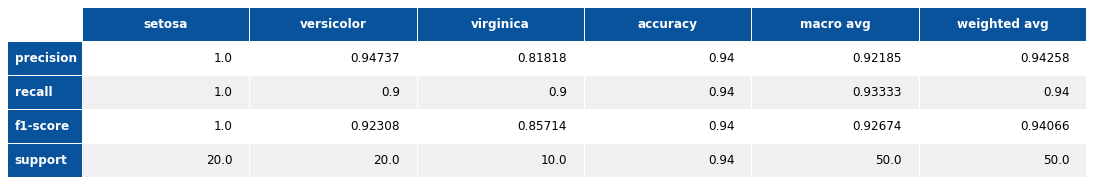

In [306]:
from matplotlib import pyplot as plt
import six

dict_report = pd.DataFrame(
            classification_report(
                y_true=test_label,
                y_pred=test_predict,
                target_names=label_map_list,
                output_dict=True
            )
        )

dict_report = round(dict_report, 5)
row_colors = ['#f0f0f0', 'w']
col_width, row_height, header_columns = 3.0, 0.625, 0
size = (np.array(dict_report.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
fig, ax = plt.subplots(figsize=size)
ax.axis('off')

table = ax.table(cellText=dict_report.values,
                         bbox=[0, 0, 1, 1],
                         colLabels=dict_report.columns,
                         rowLabels=dict_report.index)

table.auto_set_font_size(False)
table.set_fontsize(12)

for k, cell in six.iteritems(table._cells):
    cell.set_edgecolor('white')
    if k[0] == 0 or k[1] < header_columns:
        cell.set_text_props(weight='bold', color='w')
        cell.set_facecolor('#09539d')
    else:
        cell.set_facecolor(row_colors[k[0] % len(row_colors)])

fig = ax.get_figure()
plt.show()
plt.close()

<br>

이제 준비과정을 모두 마쳤습니다. 다음 시간부터는 다양한 머신러닝 알고리즘을 배우고 실습을 진행해보겠습니다. 감사합니다!